**구글 드라이브 연동**

In [2]:
# Colab 사용시 실행

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**현재 내 위치잘 있나 파악**

In [3]:
!pwd

/content


**라이브러리 및 환경 구축**

In [4]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.0/874.0 kB 46.8 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO
from roboflow import Roboflow
import glob
import os
import random

**Roboflow 데이터 연동**

In [6]:
rf = Roboflow(api_key="pwucV0qVeD2nO2PjRqon")
project = rf.workspace("smart-farm-juaeh").project("1-2-rthaj")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.99, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to 1,2단계-상추-1 in yolov8:: 100%|██████████| 5512/5512 [00:01<00:00, 4644.52it/s]


**모델 학습**

In [40]:
!pwd

/content/Level_1_and_2


**폴더 이동**

In [36]:
%cd /content/Level_1_and_2

/content/Level_1_and_2


In [46]:
model = YOLO(model='yolov8n.pt', task='detect')

model.train(data='/content/Level_1_and_2/data.yaml',
            epochs=10,
            patience=5,
            save=True, # 모델 중간 저장 활성
            project='trained',
            name='trained_model',#모델 저장 경로 및 이름, trained/trained_model/weights 폴더에 가중치(weight) 파일들이 자동으로 저장
            exist_ok=False,
            pretrained=True,       # False는 잘 안씀, 주로 True로 학습된 가중치 불러와서 사용함
            optimizer='auto',
            verbose=False,
            seed=2023,
            resume=False,
            freeze=None
            )

Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Level_1_and_2/data.yaml, epochs=10, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=trained, name=trained_model10, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=2023, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 98.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Level_1_and_2/train/labels... 2406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2406/2406 [00:01<00:00, 1741.89it/s]


train: New cache created: /content/Level_1_and_2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Level_1_and_2/valid/labels... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<00:00, 578.40it/s]


val: New cache created: /content/Level_1_and_2/valid/labels.cache
Plotting labels to trained/trained_model10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to trained/trained_model10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.27G      0.612      1.201     0.9084         21        640: 100%|██████████| 151/151 [00:57<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        229        928      0.934       0.95      0.974      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.15G     0.5178     0.6438     0.8536         16        640: 100%|██████████| 151/151 [00:54<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]


                   all        229        928      0.927      0.946      0.977       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.15G     0.5037     0.5282      0.854         16        640: 100%|██████████| 151/151 [00:58<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]


                   all        229        928       0.96      0.974      0.988      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.16G     0.4795     0.4456     0.8474         30        640: 100%|██████████| 151/151 [00:53<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        229        928      0.958      0.971      0.988      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.15G     0.4614      0.393     0.8429         26        640: 100%|██████████| 151/151 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        229        928      0.977      0.969      0.991      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.15G     0.4416     0.3664       0.84         31        640: 100%|██████████| 151/151 [00:46<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        229        928      0.977      0.983      0.989      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.15G     0.4245     0.3319     0.8337         21        640: 100%|██████████| 151/151 [00:50<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        229        928      0.974       0.98      0.988      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.16G     0.4089     0.3066     0.8302         31        640: 100%|██████████| 151/151 [00:51<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.93it/s]

                   all        229        928       0.98      0.979      0.988      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.15G     0.4006      0.286     0.8306         16        640: 100%|██████████| 151/151 [00:49<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        229        928      0.982      0.985      0.991      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.15G     0.3773     0.2623     0.8222         31        640: 100%|██████████| 151/151 [00:49<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        229        928      0.985      0.985       0.99      0.948



10 epochs completed in 0.155 hours.
Optimizer stripped from trained/trained_model10/weights/last.pt, 6.2MB
Optimizer stripped from trained/trained_model10/weights/best.pt, 6.2MB

Validating trained/trained_model10/weights/best.pt...
Ultralytics YOLOv8.2.99 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


                   all        229        928      0.985      0.985       0.99      0.949
Speed: 0.5ms preprocess, 3.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to trained/trained_model10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dafe3578970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

**Test 이미지 불러오기**

In [48]:
# 테스트 이미지 경로 설정
test_image = "/content/Level_1_and_2/test/images"
test_label = "/content/Level_1_and_2/test/labels"

# 테스트 데이터에서 파일 패턴에 맞는 경로를 얻기 위해 glob 함수 사용
test_random = glob.glob(os.path.join(test_image, "*.jpg")) # glob() 함수로 호출
random_image = random.sample(test_random, 10)

**함수**

In [57]:
# test 이미지 예측 결과 및 실제 바운딩 박스 시각화하는  함수
def test_predict(test_image, model, test_label):
    # 이미지 로드
    img = cv2.imread(test_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 모델 예측
    results = model.predict(test_image)
    predicted_img = results[0].plot()  # 모델이 예측한 바운딩 박스가 그려진 이미지

    # 실제 라벨 불러오기
    label_path = os.path.join(test_label, os.path.basename(test_image).replace(".jpg", ".txt"))
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = f.readlines()

        # 실제 바운딩 박스 그리기
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            img_height, img_width = img.shape[:2]
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            # 바운딩 박스 그리기 (초록색: 실제 라벨)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return predicted_img, img  # 예측된 이미지, 실제 라벨이 그려진 이미지


#  예측 결과 및 실제 바운딩 박스 plot으로 10개씩 구현
def show_comparisons(random_image, model, test_label):
    plt.figure(figsize=(20, 40))
    for i, test_image in enumerate(random_image):
        predicted_img, actual_img = test_predict(test_image, model, test_label)

        # 왼쪽: 예측된 이미지
        plt.subplot(10, 2, 2 * i + 1)
        plt.imshow(predicted_img)
        plt.title(f"Predicted {os.path.basename(test_image)}")

        # 오른쪽: 실제 라벨이 그려진 이미지
        plt.subplot(10, 2, 2 * i + 2)
        plt.imshow(actual_img)
        plt.title(f"Actual {os.path.basename(test_image)}")

    plt.tight_layout()
    plt.show()

**함수 실행**

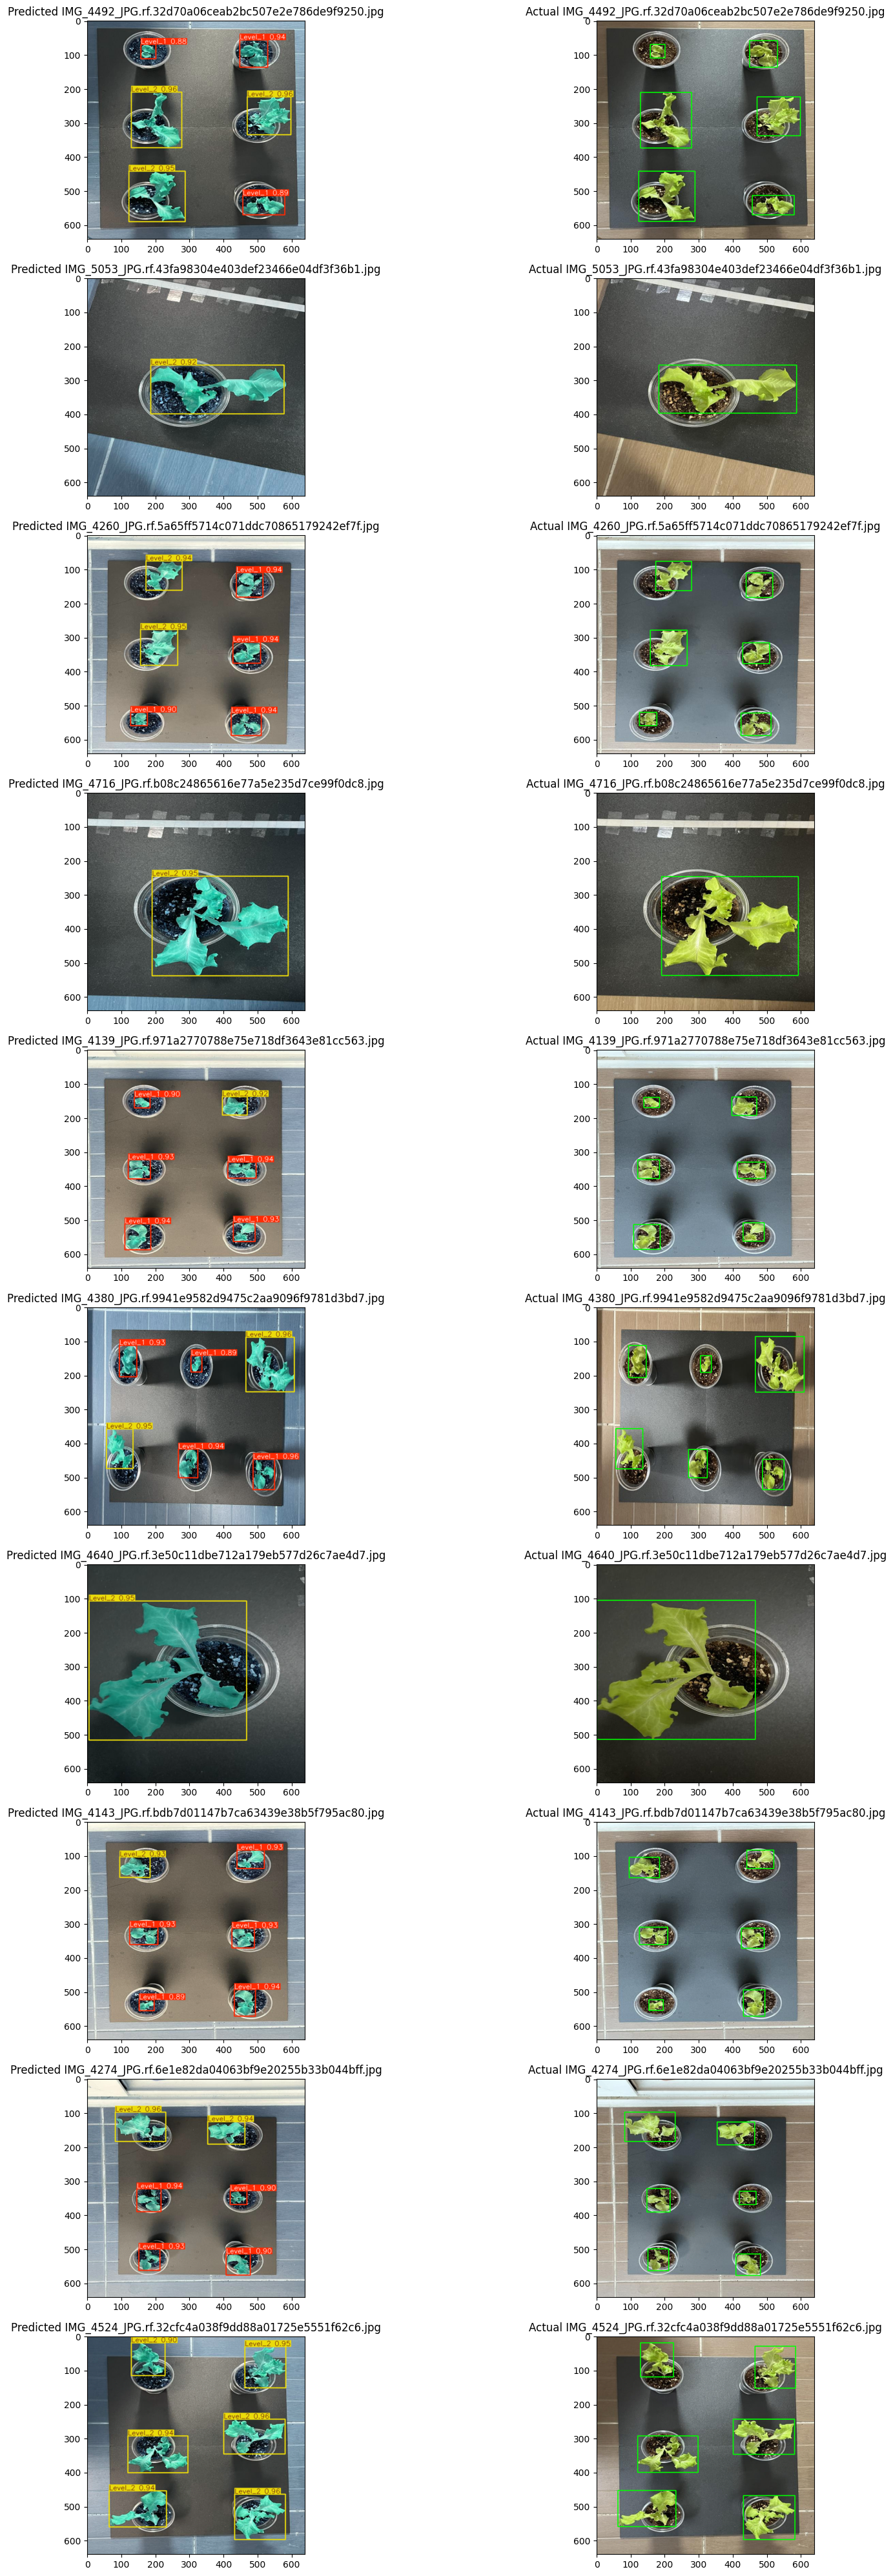

In [58]:
import matplotlib.pyplot as plt
import cv2

# 랜덤 이미지에 대한 예측과 실제 라벨 비교 시각화
show_comparisons(random_image, model, test_label)